# Mechine Learning --*Scikit-learn*

## datasets Structure

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample.
***This is a case where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.***

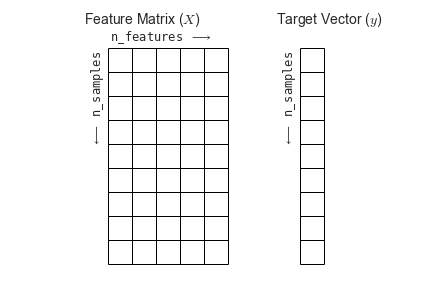

数据集一般采用字典表示，格式说明如下：  
<table>
    <tr>
        <td width = '40%'> **显示**
        <td>**说明**
    <tr>
        <td>('target_names',(3L,))
        <td>标签种类，共有三种标签（以元组形式表示)
    <tr>
        <td>('data',(n_samples,n_features))
        <td>样本数组
    <tr>
        <td>('target',(n_samples,))
        <td>每个样本的标签，共有n_samples个标签
    <tr>
        <td>('DESCR')
        <td>数据集的描述
    <tr>
        <td>以下可选
    <tr>
        <td>('feature_names',(n_features,))
        <td>每个feature对应的意义
    <tr>
        <td>('images',(n_samples,size))
        <td>样本为images，共有n_samples张，大小为size（用元组表示）

     



#### Available Data of Scikit learn
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

####  ***下面以scikit-learn自带的iris数据集进行说明***

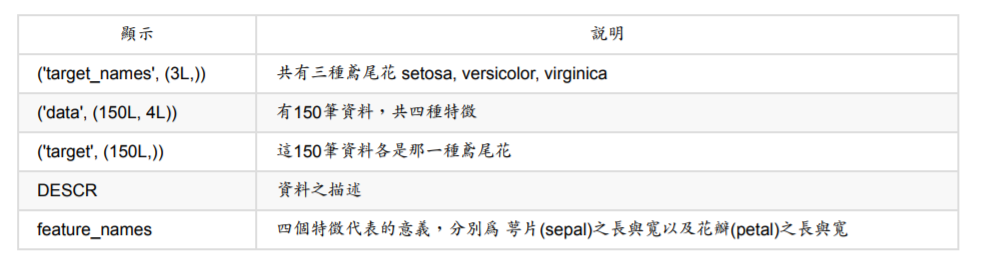

In [1]:
#读取内置iris数据集
import seaborn; seaborn.set()
from sklearn.datasets import load_iris
iris = load_iris()
#显示字典关键字
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
#查看数据集样本数组样本数量和特征数量 data：（n_samples * n_features)
data = iris.data
n_samples, n_features = data.shape
print(n_samples, n_features)
#查看第一个样本特征
print(data[0:5,:])

150 4
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [3]:
#查看数据集样本对应的标签 target: n_samples * 1
target = iris.target
print(target.shape)
print(target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
#查看标签具体名称
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
#查看features
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
#查看数据集的具体描述
desc = iris.DESCR
print(desc)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

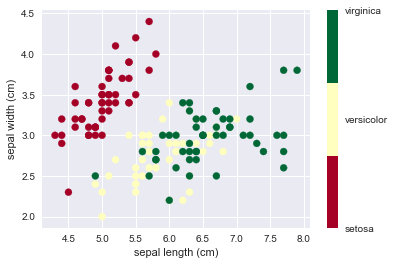

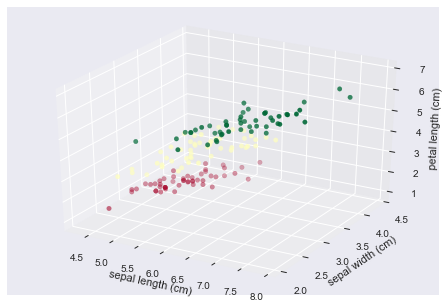

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as a3d
x_index = 0
y_index = 1
z_index = 2

fig_1 = plt.figure(1)
#scatter 函数中c可以是一个序列，通过定义get_cmap函数（‘颜色’，数量）中的数量进行c中序列值与颜色的匹配
#此处target中的 0， 1， 2 分别对应red， yello， green
plt.scatter(data[:,x_index], data[:,y_index], c = iris.target, cmap = plt.cm.get_cmap('RdYlGn',3))
#将colorbar 的ticks与标签值进行匹配
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks = [0, 1, 2], format = formatter)
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])
plt.show()
#以前面3个特征创建一个3维视图
fig_2 = plt.figure(2)
ax = a3d(fig_2)
ax.scatter(data[:,x_index], data[:,y_index], data[:, z_index], c = iris.target, cmap = plt.cm.get_cmap('RdYlGn',3))
ax.set_xlabel(feature_names[x_index])
ax.set_ylabel(feature_names[y_index])
ax.set_zlabel(feature_names[z_index])
plt.show()